In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Evil Geniuses Data Science Assessment

## Load Data

In [2]:
df = pd.read_csv('data/starcraft_player_data.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


## Cleaning Data

### Removing NaN

There are many rows with ? as data entries, so I dropped those rows from the dataset for simplicity.

In [3]:
mask = np.column_stack([df[col].astype(str).str.contains(r"\?") for col in df])
df = df.loc[~mask.any(axis=1)].dropna()
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


### Converting dTypes

Checking data types to ensure all numerical data is in int/float form

In [4]:
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

Age, HoursPerWeek, and TotalHours are objects (likely due to previous existing ? entries), so these columns will be converted to integers. 

In [5]:
df[["Age", "HoursPerWeek", "TotalHours"]] = df[["Age", "HoursPerWeek", "TotalHours"]].astype(int)
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

## EDA

A general description of the data:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,3338.0,4719.552127,2656.919630,52.000000,2423.250000,4788.000000,6994.750000,9271.000000
LeagueIndex,3338.0,4.120731,1.448170,1.000000,3.000000,4.000000,5.000000,7.000000
Age,3338.0,21.650389,4.206357,16.000000,19.000000,21.000000,24.000000,44.000000
HoursPerWeek,3338.0,15.909527,11.964495,0.000000,8.000000,12.000000,20.000000,168.000000
TotalHours,3338.0,960.421809,17318.133922,3.000000,300.000000,500.000000,800.000000,1000000.000000
APM,3338.0,114.575763,48.111912,22.059600,79.231500,107.070300,140.156100,389.831400
SelectByHotkeys,3338.0,0.004023,0.004726,0.000000,0.001245,0.002445,0.004945,0.043088
AssignToHotkeys,3338.0,0.000364,0.000210,0.000000,0.000202,0.000349,0.000493,0.001648
UniqueHotkeys,3338.0,4.316357,2.333322,0.000000,3.000000,4.000000,6.000000,10.000000
MinimapAttacks,3338.0,0.000094,0.000159,0.000000,0.000000,0.000039,0.000113,0.003019


The table above is hard to interpret, so I will opt for a visual approach.

To see if there is any linear correlation between factors, I will plot correlations for all possible pairs of factors on a heatmap. 

<AxesSubplot:>

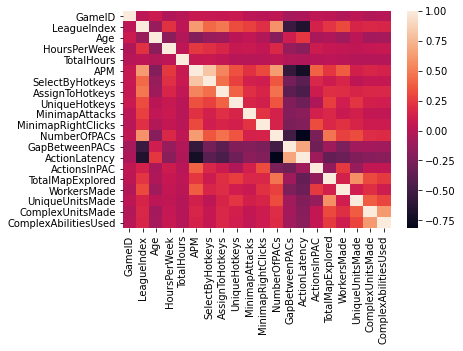

In [7]:
sns.heatmap(df.corr())

Now, to get a general idea for the distribution of data values, I will plot density plots for each numerical factor based on each LeagueIndex. In order to do this, I will need to create a new table in order to easily plot the distributions for all factors. 

In [8]:
# Index on LeagueIndex
tidy_df = df.set_index("LeagueIndex")

# Stack column names into a column, obtaining a "long" version of the dataset
tidy_df = tidy_df.stack()
# Reset indices into proper columns for plotting purposes
tidy_df = tidy_df.reset_index()
# Rename column names
tidy_df = tidy_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_df

,LeagueIndex,Attribute,Values
0,5,GameID,52.000000
1,5,Age,27.000000
2,5,HoursPerWeek,10.000000
3,5,TotalHours,3000.000000
4,5,APM,143.718000
...,...,...,...
63417,4,TotalMapExplored,20.000000
63418,4,WorkersMade,0.000476
63419,4,UniqueUnitsMade,8.000000
63420,4,ComplexUnitsMade,0.000000


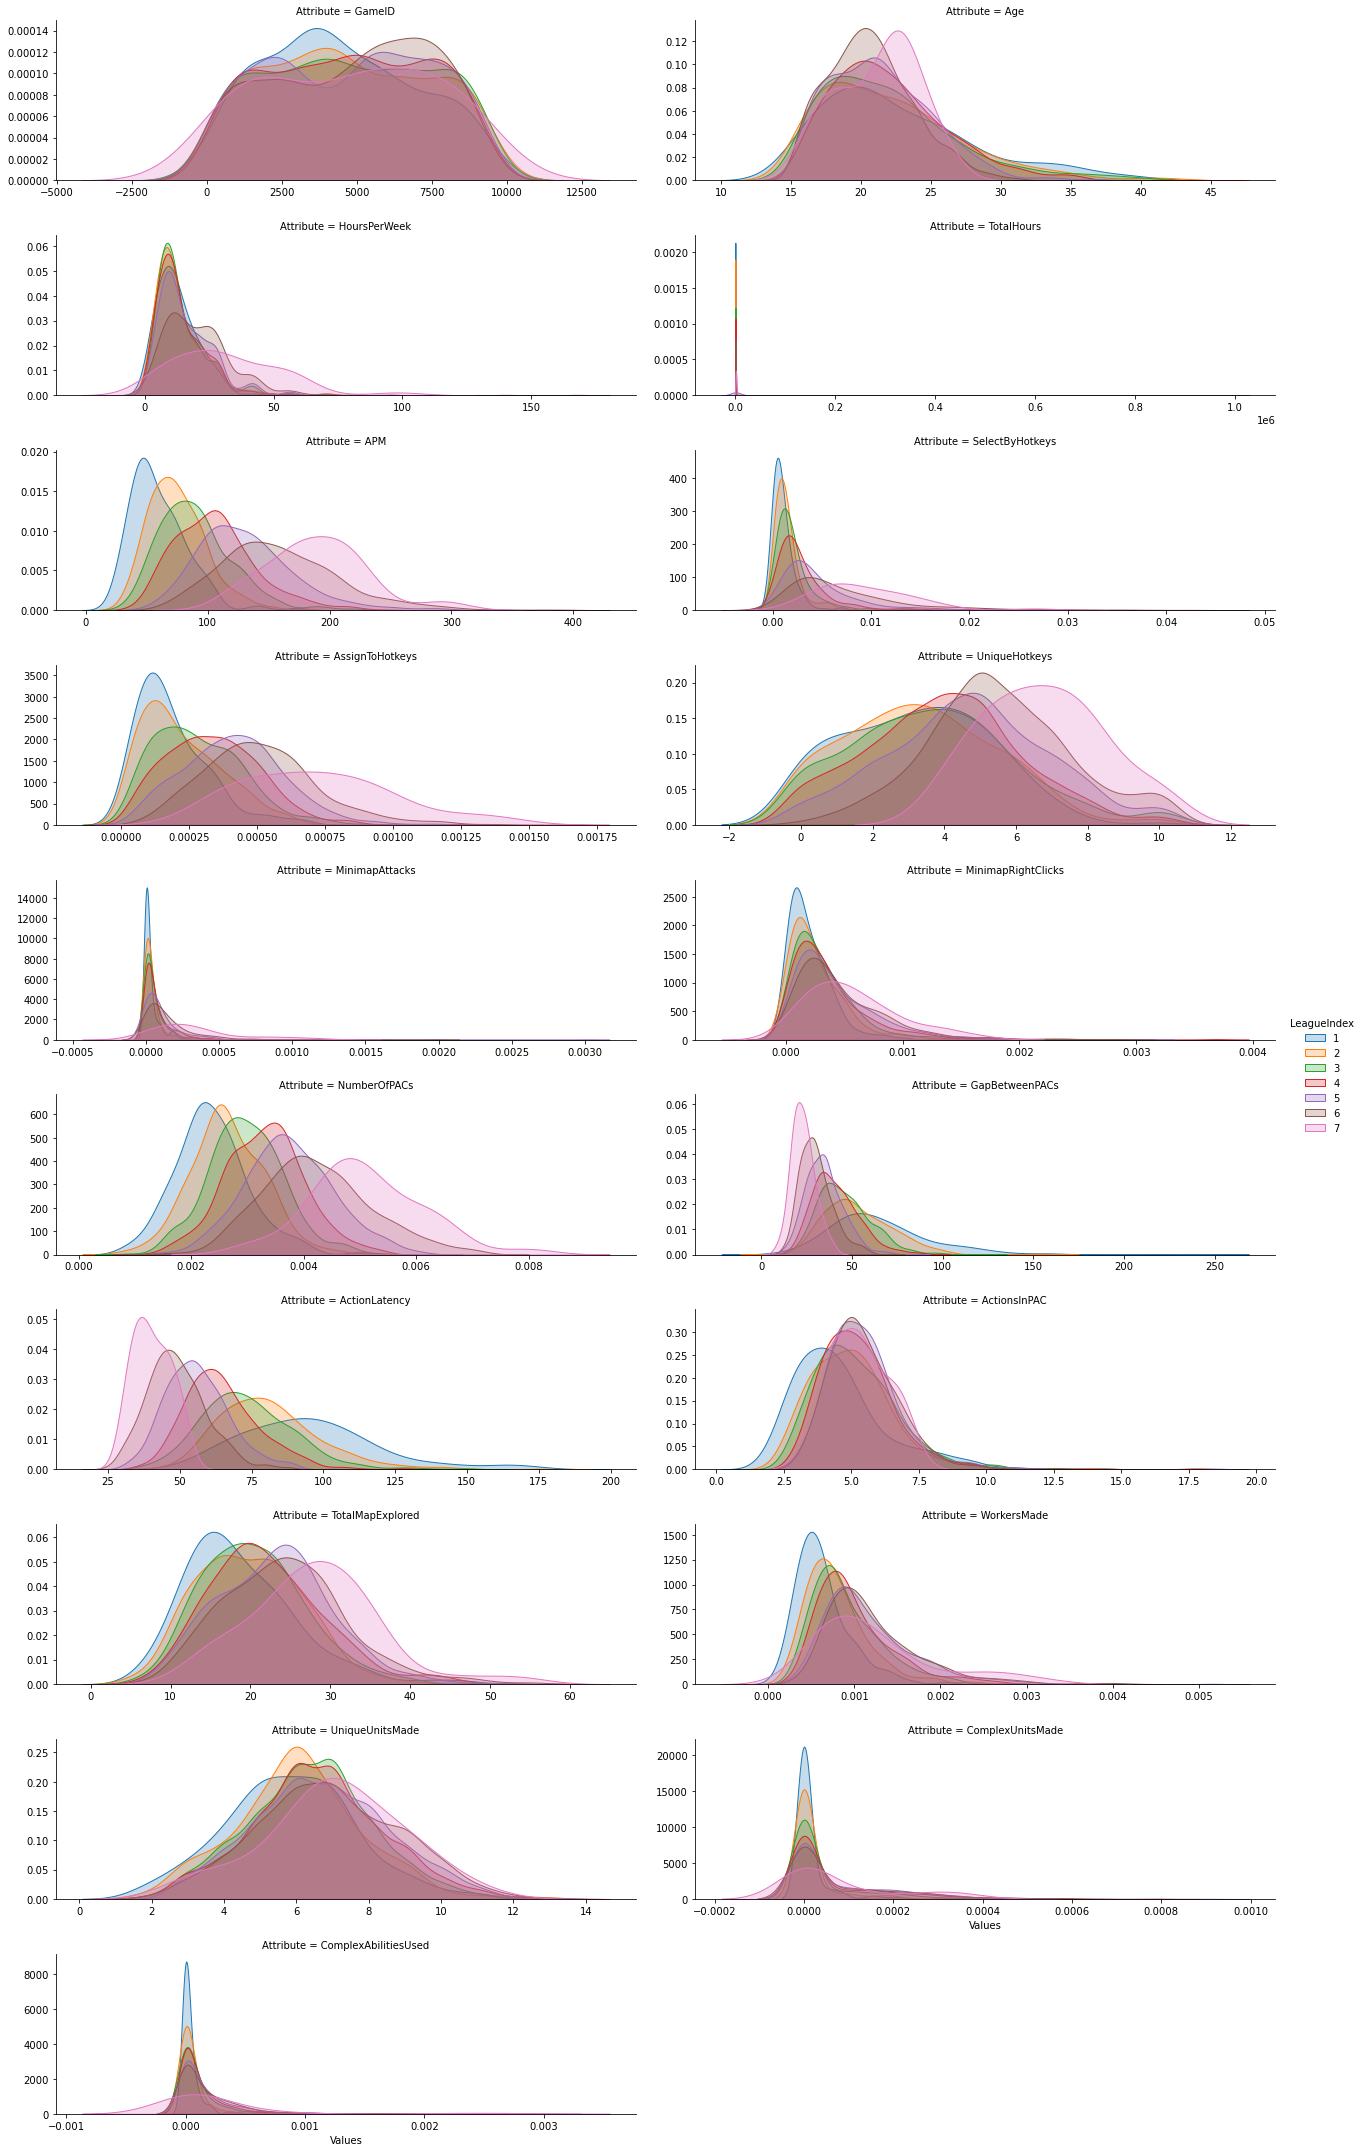

In [9]:
facets = sns.FacetGrid(data=tidy_df, col='Attribute', hue="LeagueIndex", 
                      sharey=False, sharex=False, aspect=3, col_wrap=2)
    # Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

From the plots above, factors involving Hotkeys, PACs, and ActionLatency seem to have meaningful correlations/distinctions between each league, so I will explore those further in the next section.

## Modeling

In [10]:
import sklearn.ensemble as ske
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet, LogisticRegression

model_performance is a function used to obtain accuracy and error scores for each model.

In [11]:
def model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_sqerr = mean_squared_error(model.predict(X_train), y_train)
    test_sqerr = mean_squared_error(model.predict(X_test), y_test)
    mean_test_err = mean_absolute_error(model.predict(X_test), y_test)
    
    ## The lines below can be commented out to print values, currently commented to 
    ## reduce model output 
    
#     print("score for the training set: ", train_score)
#     print("score for the test set: ", test_score)
#     print("mean squared error for the training set: ", train_sqerr)
#     print("mean squared error for the test set: ", test_sqerr)
#     print("mean abs error for test set: ", mean_test_err)

    return {"train_score": train_score, 
            "test_score": test_score, 
            "train_sqerr":train_sqerr, 
            "test_sqerr":test_sqerr, 
            "mean_test_err":mean_test_err}

identify_features will run a certain model using each feature individually, and rank each feature based on its resulting r2 score. The model later on will take the n best features for testing. 

In [12]:
def identify_features(model, X, y):
    rankings_df = pd.DataFrame(columns=['feature', 'R2_score'])
    for feature in X.columns.values:
        m = model.fit(X[[feature]], y)
        rankings_df = rankings_df.append({'feature': feature, 'R2_score': r2_score(X[[feature]], y)}, ignore_index=True)
    return rankings_df.sort_values(by=['R2_score'])


In [13]:
def model(model, df, num_features, test_size, nfeatures=None):
    
    ## not taking GameID into consideration (simiar to a player's name, an ID has no effect on results)
    df = df.drop(columns="GameID") 

    features = identify_features(model, df.drop(columns="LeagueIndex"), df["LeagueIndex"])
    ## Comment out to display r2 scores for each feature ##
#     display(features)
    
    n_features = features.feature[-num_features:]
    if nfeatures != None:
        n_features = nfeatures
    print("features: " + str(list(n_features)))

    train, test = train_test_split(df, test_size=test_size)

    X_train = train[n_features]
    y_train = train["LeagueIndex"]
    model.fit(X_train, y_train)

    X_test = test[n_features]
    y_test = test["LeagueIndex"]

    y_pred = model.predict(X_test)
    test["LeagueIndex_pred"] = y_pred

    return model_performance(model, X_train, y_train, X_test, y_test)

### Linear Regression

Since the obvious assumption is to assume linear increases/decreases as leagues increase/decrease, I will try modeling using lnear regression.

Manually selecting features just from visually looking at plots:

In [14]:
linreg = LinearRegression()

In [15]:
features = {"APM", 
            "AssignToHotkeys", 
            "UniqueHotkeys", 
            "TotalMapExplored", 
            "NumberOfPACs", 
            "ActionLatency", 
            "HoursPerWeek"}
model(linreg, df, 7, 0.2, features)

features: ['NumberOfPACs', 'AssignToHotkeys', 'HoursPerWeek', 'UniqueHotkeys', 'APM', 'TotalMapExplored', 'ActionLatency']


{'train_score': 0.5075427766110848,
 'test_score': 0.5188473943822968,
 'train_sqerr': 1.0246396334120993,
 'test_sqerr': 1.0383926750715238,
 'mean_test_err': 0.8248180744140132}

Automatic feature selection based on r2 scores, then taking means of multiple random runs of each model with different n number of features selected.

In [16]:
for i in np.arange(3,9):
    print("num_features: ", i)
    mean_test_score = []
    for j in range(20):
        output = model(linreg, df, i, 0.2)["test_score"]
        if output >= 0:
            mean_test_score.append(output)
    
    mean_test_score = np.mean(mean_test_score)
    print("Mean test score: ", mean_test_score)

num_features:  3
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys

features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', '

### Logistic Regression

Modeling with logistic correlation

In [17]:
logreg = LogisticRegression()
for i in np.arange(3,9):
    print("num_features: ", i)
    mean_test_score = []
    for j in range(5):
        output = model(logreg, df, i, 0.2)["test_score"]
        if output >= 0:
            mean_test_score.append(output)
    
    mean_test_score = np.mean(mean_test_score)
    print("Mean test score: ", mean_test_score)

num_features:  3
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  0.24461077844311374
num_features:  4
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  0.29371257485029945
num_features:  5
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade

### Random Forest: a non-linear approach

A more complex and less interpretable model, but potentially a better fit/predictor for the data.

In [18]:
rf = ske.RandomForestRegressor()


In [19]:
model(rf, df, 7, 0.2)

features: ['APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']


{'train_score': 0.9367271649520976,
 'test_score': 0.4585047964627068,
 'train_sqerr': 0.1347134831460674,
 'test_sqerr': 1.0527838323353294,
 'mean_test_err': 0.8144311377245509}

In [20]:

for i in np.arange(3,9):
    print("num_features: ", i)
    mean_test_score = 0
    for j in range(10):
        output = model(rf, df, i, 0.2)
        mean_test_score += output["test_score"]
    
    mean_test_score /= 10
    print("Mean test score: ", mean_test_score)

num_features:  3
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  0.12678565183905435
num_features:  4
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHou

### Other models:

Testing performances of different models below for different errors, collinearity, and/or outliers.

### Ridge

In [21]:
ridge = RidgeCV()

for i in np.arange(3,9):
    print("num_features: ", i)
    mean_test_score = 0
    for j in range(3):
        output = model(ridge, df, i, 0.2)
        mean_test_score += output["test_score"]
    
    mean_test_score /= 3
    print("Mean test score: ", mean_test_score)

num_features:  3
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  0.12686054143157108
num_features:  4
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  -63.24275095617651
num_features:  5
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  -30.22541190257431
num_features:  6
features: ['GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['GapBetweenPACs', 'Uniq

### Lasso

In [22]:
l = LassoCV()

for i in np.arange(3,9):
    print("num_features: ", i)
    mean_test_score = 0
    for j in range(3):
        output = model(l, df, i, 0.2)
        mean_test_score += output["test_score"]
    
    mean_test_score /= 3
    print("Mean test score: ", mean_test_score)

num_features:  3
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  -26.83382136709984
num_features:  4
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  -0.000914553193532397
num_features:  5
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
Mean test score:  -41.25553219584447
num_features:  6
features: ['GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', 'UniqueHotkeys']
features: ['GapBetweenPACs', 'Un

These models do not seem to be particularly useful, with many outputs resulting in negative r2 values (model is worse than predicting the mean).

##  Interpretations

From the models above, I was able to use different factors to predict a player's league with r2 scores of ~0.45-0.55. An r2 score below 0.7 typically indicates a mediocre correlation, so the models above do not necessarily show good correlations with league. 

However, there are a set of factors consistently picked out across all models, which include: 'TotalMapExplored', 'APM', 'GapBetweenPACs', 'UniqueUnitsMade', 'ActionsInPAC', 'HoursPerWeek', 'TotalHours', and 'UniqueHotkeys'. These factors are mostly skill-based factors, which would make sense since a player likely improves their league position based on differences in skill. 

I also tested both linear and non-linear models, with the non-linear random forest model returning slightly higher correlation than the linear regression model. In other words, this means that the linear model may have slightly lower correlation with league compared to other models, but there is a strong enough linear correlation to say that rank can be modeled after a linear combination of factors.

#### Hypothetical

If players league positions were to be modeled, the findings above suggest that skill-based factors should be used. However, measurements for active vs non-active players may differ. For example, a non-active player may have 10,000 hours played over 5 years and have a league of 6, but is currently inactive and plays only 2 hours per week. However, an active player may also be a level 6, but has been playing for 15 hours per week over 1 year. Collecting more granular data on active vs non-active players may help with determining rank as well. 

In a similar vein, it may be helpful to further explore the impact of aggregate vs total values. For example, my models used both total hours played and hours per week; picking one or the other may lead to different observations as well. 